In [1]:
import numpy as np
import openfermion
from openfermion.chem import MolecularData
from openfermionqchem import run_qchem
import qeom

In [2]:
def print_result(bond,energy):   
    string1,string2 = "Total Energy\n","Excitation Energy\n"
    
    for i in range(len(bond)):
        string1 += "{:4.2f}".format(bond[i])
        string2 += "{:4.2f}".format(bond[i])

        for j in range(len(energy[i])):
            string1 += "{:15.10f}".format(energy[i][j])
        string1 += '\n'

        for j in range(1,len(energy[i])):
            string2 += "{:15.10f}".format((energy[i][j] - energy[i][0]) * 27.211324570273)
        string2 += '\n'
        
    print(string1+'\n'+string2)

## LiH/STO-3G

In [3]:
# Set molecule parameters.
# We do not run calculations through OpenFermion directly.
basis        = 'sto-3g'
multiplicity = 1

# Generate molecule at different bond lengths.
bond_length_interval = 0.1
n_points = 11
singlet  = []
triplet  = []
bond_lengths = []

for point in range(n_points):
    bond_length    = 1.0 + point * bond_length_interval
    geometry       = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule       = MolecularData(geometry, basis, multiplicity)
    directory      = "/Users/yongbinkim/Desktop/venv/publish/qeom-davidson/OpenFermion-QChem/examples/"
    system         = 'LiH/eom-ccsd/sto-3g/'+str(round(bond_length,2))+'/'
    molecule       = run_qchem(molecule,file_directory=directory+system,output_name='test_qis')

    print("r = {:4.2f}".format(bond_length))
    bond_lengths.append(bond_length)

    # ground state
    gs = qeom.Adapt_VQE(molecule)
    gs.run()
    
    qeom_davidson = qeom.DavidsonVar(gs=gs)
    
    # singlet
    qeom_davidson.run(nroot=2,spin='singlet')
    singlet.append(qeom_davidson.energy)
    
    # triplet
    qeom_davidson.run(nroot=2,spin='triplet')
    triplet.append(qeom_davidson.energy)
    
singlet      = np.array(singlet)
triplet      = np.array(triplet)
bond_lengths = np.array(bond_lengths)

r = 1.00
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     -7.77942140     0.200      0.00
      2     -7.78176417     0.102      0.00
      3     -7.78268902     0.080      0.00
      4     -7.78356678     0.071      0.00
      5     -7.78363788     0.061      0.00
      6     -7.78373508     0.054      0.00
      7     -7.78378944     0.048      0.00
      8     -7.78381916     0.044      0.00
      9     -7.78387966     0.040      0.00
     10     -7.78406643     0.035      0.00
     11     -7.78410474

      1     -7.82062283     0.198      0.00
      2     -7.82308340     0.098      0.00
      3     -7.82392010     0.074      0.00
      4     -7.82471567     0.065      0.00
      5     -7.82479233     0.055      0.00
      6     -7.82499625     0.047      0.00
      7     -7.82504629     0.045      0.00
      8     -7.82508626     0.041     -0.00
      9     -7.82511729     0.039      0.00
     10     -7.82513376     0.036      0.00
     11     -7.82517233     0.033     -0.00
     12     -7.82518944     0.030     -0.00
     13     -7.82522746     0.027      0.00
     14     -7.82524442     0.024     -0.00
     15     -7.82552352     0.020      0.00
     16     -7.82552738     0.008     -0.00
     17     -7.82552803     0.007      0.00
     18     -7.82552896     0.006     -0.00
     19     -7.82552971     0.005      0.00
     20     -7.82553059     0.002      0.00
     21     -7.82553292     0.001     -0.00
     22     -7.82553292*    0.001     -0.00
 -------------------------------

     12     -7.85237317     0.027      0.00
     13     -7.85238238     0.020     -0.00
     14     -7.85239745     0.017     -0.00
     15     -7.85241355     0.014      0.00
     16     -7.85242163     0.010      0.00
     17     -7.85242264     0.006      0.00
     18     -7.85242300     0.004     -0.00
     19     -7.85242365     0.004      0.00
     20     -7.85242428     0.002      0.00
     21     -7.85242588     0.001     -0.00
     22     -7.85242588*    0.001     -0.00
 ------------------------------------------------
 SCF energy                   = -7.83561583
 ADAPT-VQE correlation energy = -0.01681005
 ADAPT-VQE energy             = -7.85242588

 ADAPT-VQE calculation: 617.52 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 ----------------------------------------------------------------------------------

     18     -7.86913137     0.006      0.00
     19     -7.86913187     0.003      0.00
     20     -7.86913233     0.002     -0.00
     21     -7.86913833     0.001     -0.00
     22     -7.86913833*    0.000     -0.00
 ------------------------------------------------
 SCF energy                   = -7.85195386
 ADAPT-VQE correlation energy = -0.01718447
 ADAPT-VQE energy             = -7.86913833

 ADAPT-VQE calculation: 2335.33 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
     

     21     -7.87844784     0.001      0.00
     22     -7.87845065     0.001     -0.00
     23     -7.87845065*    0.001     -0.00
 ------------------------------------------------
 SCF energy                   = -7.86053866
 ADAPT-VQE correlation energy = -0.01791199
 ADAPT-VQE energy             = -7.87845065

 ADAPT-VQE calculation: 5037.15 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1750      -7.6807262554            5.3803426553
      2     1    

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1755      -7.6860538389            5.3417320713
      2     1     3       0.1648      -7.7053109254            4.8177212407
      3     1     5       0.0709      -7.7394038434            3.8900077838
      4     1     6       0.0526      -7.7416935706            3.8277012731
      5     1     7       0.0489      -7.7417650413            3.8257564620
      6     1     9       0.0397      -7.7431805955            

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1764      -7.6877874717            5.2935324803
      2     1     3       0.1630      -7.7095979192            4.7000413130
      3     1     5       0.0734      -7.7438113891            3.7690474792
      4     1     6       0.0540      -7.7464659874            3.6968123447
      5     1     8       0.0441      -7.7482391813            3.6485613894
      6     1     9       0.0398      -7.7483101657            

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1778      -7.6865955450            5.2473420516
      2     1     3       0.1613      -7.7114811339            4.5701722160
      3     1     5       0.0763      -7.7458438983            3.6351158790
      4     1     6       0.0555      -7.7489820932            3.5497214403
      5     1     8       0.0441      -7.7512259914            3.4886619967
      6     1     9       0.0400      -7.7512916343            

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1797      -7.6829875551            5.2119186827
      2     1     3       0.1598      -7.7115406115            4.4349521975
      3     1     5       0.0793      -7.7459709869            3.4980560774
      4     1     6       0.0567      -7.7497301994            3.3957629272
      5     1     8       0.0429      -7.7526040809            3.3175608056
      6     1     9       0.0389      -7.7526681233            

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1823      -7.6772290269            5.1976707164
      2     1     3       0.1586      -7.7101772960            4.3011046707
      3     1     5       0.0832      -7.7444788041            3.3677152006
      4     1     6       0.0588      -7.7490227815            3.2440675570
      5     1     8       0.0421      -7.7527300932            3.1431866955
      6     1     9       0.0380      -7.7527924185            

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|110110000000> + 0.70711|111001000000>
      1     1     2       0.1856      -7.6695890710            5.2109236644
      2     1     3       0.1576      -7.7077641432            4.1721293840
      3     1     5       0.0879      -7.7416377127            3.2503846912
      4     1     6       0.0616      -7.7471982739            3.0990744533
      5     1     8       0.0414      -7.7519926888            2.9686120757
      6     1     9       0.0372      -7.7520568521            

In [4]:
print("Singlet")
print_result(bond_lengths,singlet)

Singlet
Total Energy
1.00  -7.7844576396  -7.6444751532  -7.5857306911
1.10  -7.8255329200  -7.6810745068  -7.6239972585
1.20  -7.8524258791  -7.7064591312  -7.6506774234
1.30  -7.8691383317  -7.7240450797  -7.6693239814
1.40  -7.8784506492  -7.7360308471  -7.6821953374
1.50  -7.8823593167  -7.7440632513  -7.6910473692
1.60  -7.8823216432  -7.7491555872  -7.6969781306
1.70  -7.8794322457  -7.7520887983  -7.7008212193
1.80  -7.8745224681  -7.7534116280  -7.7031647711
1.90  -7.8682403355  -7.7534857074  -7.7044117900
2.00  -7.8610874176  -7.7526942678  -7.7049582558

Excitation Energy
1.00   3.8091088724   5.4076234958
1.10   3.9309047678   5.4840522968
1.20   3.9719485526   5.4898427097
1.30   3.9481795726   5.4372131381
1.40   3.8754314589   5.3403669886
1.50   3.7632191238   5.2058514983
1.60   3.6236247713   5.0434424785
1.70   3.4651838789   4.8602426119
1.80   3.2955863788   4.6628699107
1.90   3.1226254325   4.4579917276
2.00   2.9495211796   4.2484812957



In [5]:
print("Triplet")
print_result(bond_lengths,triplet)

Triplet
Total Energy
1.00  -7.7844576396  -7.6589066218  -7.6185495618
1.10  -7.8255329200  -7.6955026945  -7.6544433600
1.20  -7.8524258791  -7.7211186028  -7.6788923682
1.30  -7.8691383317  -7.7391066033  -7.6953094804
1.40  -7.8784506492  -7.7517612011  -7.7060778528
1.50  -7.8823593167  -7.7605699796  -7.7127664313
1.60  -7.8823216432  -7.7666308585  -7.7165571435
1.70  -7.8794322457  -7.7707129607  -7.7182746290
1.80  -7.8745224681  -7.7733942745  -7.7185591870
1.90  -7.8682403355  -7.7751066027  -7.7178549565
2.00  -7.8610874176  -7.7761756646  -7.7165445692

Excitation Energy
1.00   3.4164094950   4.5145785535
1.10   3.5382946697   4.6555735488
1.20   3.5730449144   4.7220766878
1.30   3.5383355652   4.7301132903
1.40   3.4473876917   4.6904921112
1.50   3.3140491830   4.6148470509
1.60   3.1480994919   4.5106716024
1.70   2.9583957524   4.3853122139
1.80   2.7518320990   4.2439674613
1.90   2.5342922325   4.0921853606
2.00   2.3105612716   3.9332023627



In [6]:
fci_energies = np.array([[-7.7844602799,-7.6589323587,-7.6444988405,-7.6185607260,-7.5859116778],
                         [-7.8255369619,-7.6955349395,-7.6811080323,-7.6544614826,-7.6242095549],
                         [-7.8524308535,-7.7211493522,-7.7065309091,-7.6789101349,-7.6508821616],
                         [-7.8691399615,-7.7391532548,-7.7241558227,-7.6953483104,-7.6694853371],
                         [-7.8784536556,-7.7517957947,-7.7362357328,-7.7061067872,-7.6824007817],
                         [-7.8823622860,-7.7606091951,-7.7442995599,-7.7128021937,-7.6912564360],
                         [-7.8823243823,-7.7666690156,-7.7494146978,-7.7165882412,-7.6971931540],
                         [-7.8794335203,-7.7707525536,-7.7523476882,-7.7183085506,-7.7010285455],
                         [-7.8745240188,-7.7734347383,-7.7536613781,-7.7185901403,-7.7033584212],
                         [-7.8682408099,-7.7751465122,-7.7537738657,-7.7179025438,-7.7046213786],
                         [-7.8610877665,-7.7762112796,-7.7529950094,-7.7165969294,-7.7051414622]])

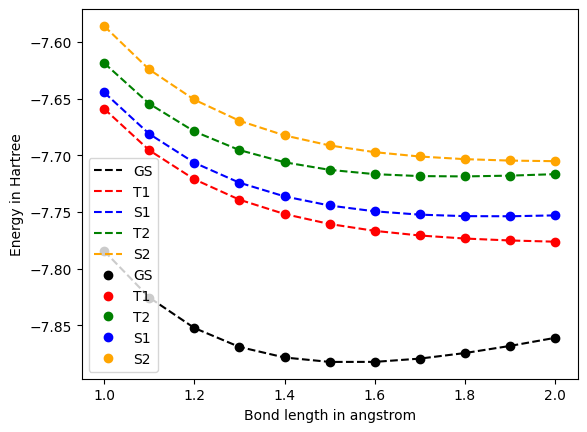

In [7]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies[:,0], '--', label='GS', color='black')
plt.plot(bond_lengths, fci_energies[:,1], '--', label='T1', color='red')
plt.plot(bond_lengths, fci_energies[:,2], '--', label='S1', color='blue')
plt.plot(bond_lengths, fci_energies[:,3], '--', label='T2', color='green')
plt.plot(bond_lengths, fci_energies[:,4], '--', label='S2', color='orange')

plt.plot(bond_lengths, triplet[:,0], 'o', label='GS', color='black')
plt.plot(bond_lengths, triplet[:,1], 'o', label='T1', color='red')
plt.plot(bond_lengths, triplet[:,2], 'o', label='T2', color='green')
plt.plot(bond_lengths, singlet[:,1], 'o', label='S1', color='blue')
plt.plot(bond_lengths, singlet[:,2], 'o', label='S2', color='orange')

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

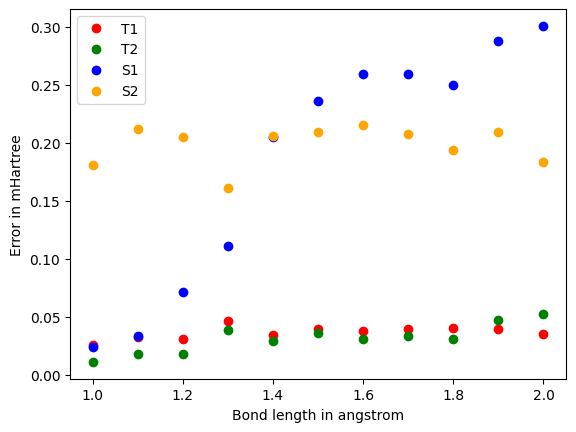

In [8]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, abs(fci_energies[:,1]-triplet[:,1])*1000, 'o', label='T1', color='red')
plt.plot(bond_lengths, abs(fci_energies[:,3]-triplet[:,2])*1000, 'o', label='T2', color='green')
plt.plot(bond_lengths, abs(fci_energies[:,2]-singlet[:,1])*1000, 'o', label='S1', color='blue')
plt.plot(bond_lengths, abs(fci_energies[:,4]-singlet[:,2])*1000, 'o', label='S2', color='orange')

plt.ylabel('Error in mHartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()